In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [2]:
n_train, n_test = 100, 100
true_w, true_b = torch.tensor([1.2, -3.4, 5.6]).view(-1, 1), 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = torch.mm(poly_features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [3]:
features[:2], poly_features[:2], labels[:2]

(tensor([[ 0.0687],
         [-0.2639]]), tensor([[ 0.0687,  0.0047,  0.0003],
         [-0.2639,  0.0697, -0.0184]]), tensor([[5.0750],
         [4.3277]]))

In [5]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
            legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogx(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogx(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [6]:
poly_features.shape, poly_features.shape[-1]

(torch.Size([200, 3]), 3)

In [15]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loass', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight: ', net.weight.data,
         '\nbias:', net.bias.data)

final epoch: train loss 0.00014742393977940083 test loass 0.000114430658868514
weight:  tensor([[ 1.1998, -3.3998,  5.6014]]) 
bias: tensor([5.0002])


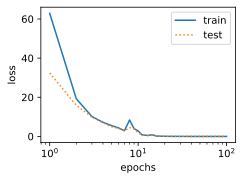

In [16]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])

final epoch: train loss 415.9351501464844 test loass 193.6612091064453
weight:  tensor([[25.0826]]) 
bias: tensor([2.3288])


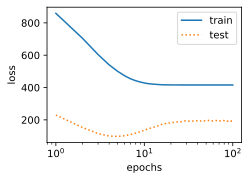

In [17]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

final epoch: train loss 0.48353317379951477 test loass 336.76434326171875
weight:  tensor([[ 0.0382, -0.2830,  0.2426]]) 
bias: tensor([4.1204])


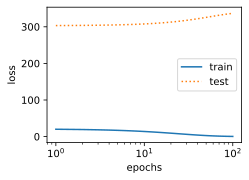

In [18]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])